In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib import *

In [2]:
# read our data
male_ankle_walk_data   = pd.read_csv("./original_dataset/male_ankle_walk.csv", parse_dates=['time'])
male_ankle_run_data    = pd.read_csv("./original_dataset/male_ankle_run.csv", parse_dates=['time'])
male_arm_walk_data     = pd.read_csv("./original_dataset/male_arm_walk.csv", parse_dates=['time'])
female_ankle_walk_data = pd.read_csv("./original_dataset/female_ankle_walk.csv",parse_dates=['time'])

In [3]:
# delete first two seconds and last three seconds
male_ankle_walk_data.drop(male_ankle_walk_data.head(200).index,inplace=True) 
male_ankle_run_data.drop(male_ankle_run_data.head(200).index,inplace=True) 
male_arm_walk_data.drop(male_arm_walk_data.head(200).index,inplace=True) 
female_ankle_walk_data.drop(female_ankle_walk_data.head(200).index,inplace=True) 

male_ankle_walk_data.drop(male_ankle_walk_data.tail(300).index,inplace=True)
male_ankle_run_data.drop(male_ankle_run_data.tail(300).index,inplace=True)
male_arm_walk_data.drop(male_arm_walk_data.tail(300).index,inplace=True)
female_ankle_walk_data.drop(female_ankle_walk_data.tail(300).index,inplace=True)

In [4]:
# drop all Nan column if exist
male_arm_walk_data.dropna(how='all')
male_ankle_run_data.dropna(how='all')
male_ankle_walk_data.dropna(how='all')
female_ankle_walk_data.dropna(how='all')

,date,time,username,wrist,activity,ax,ay,az,gFx,gFy,gFz
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [5]:
# calculate the accelerated speed
# male_arm_walk_data['acceleration'] = np.sqrt((male_arm_walk_data['ax'])**2 + (male_arm_walk_data['ay'])**2 + (male_arm_walk_data['az'])**2)
# male_ankle_run_data['acceleration'] = np.sqrt((male_ankle_run_data['ax'])**2 + (male_ankle_run_data['ay'])**2 + (male_ankle_run_data['az'])**2)
# male_ankle_walk_data['acceleration'] = np.sqrt((male_ankle_walk_data['ax'])**2 + (male_ankle_walk_data['ay'])**2 + (male_ankle_walk_data['az'])**2)
#female_ankle_walk_data['acceleration'] = np.sqrt((female_ankle_walk_data['ax'])**2 + (female_ankle_walk_data['ay'])**2 + (female_ankle_walk_data['az'])**2)

In [6]:
unclean_female_ankle_walk_data = female_ankle_walk_data.copy()

In [7]:
# https://ggbaker.ca/data-noisy_signal/content/filtering.html#filtering
def butterworth_filter(noisy_dataset):
    b, a = signal.butter(3, 0.1, btype='lowpass', analog=False)
    noisy_signal = signal.filtfilt(b, a, noisy_dataset)
    return noisy_signal

In [8]:
def help_filter(noisy_dataset):
    noisy_dataset['ax'] = butterworth_filter(noisy_dataset['ax'])
    noisy_dataset['ay'] = butterworth_filter(noisy_dataset['ay'])
    noisy_dataset['az'] = butterworth_filter(noisy_dataset['az'])
    noisy_dataset['gFx'] = butterworth_filter(noisy_dataset['gFx'])
    noisy_dataset['gFy'] = butterworth_filter(noisy_dataset['gFy'])
    noisy_dataset['gFz'] = butterworth_filter(noisy_dataset['gFz'])
    noisy_dataset['wx'] = butterworth_filter(noisy_dataset['wx'])
    noisy_dataset['wy'] = butterworth_filter(noisy_dataset['wy'])
    noisy_dataset['wz'] = butterworth_filter(noisy_dataset['wz'])
    
    return noisy_dataset

In [9]:
# filter noisy for all dataset
clean_male_ankle_walk_data = help_filter(male_ankle_walk_data)
clean_male_ankle_run_data = help_filter(male_ankle_run_data)
clean_male_arm_walk_data = help_filter(male_arm_walk_data)
clean_female_ankle_walk_data = help_filter(female_ankle_walk_data)

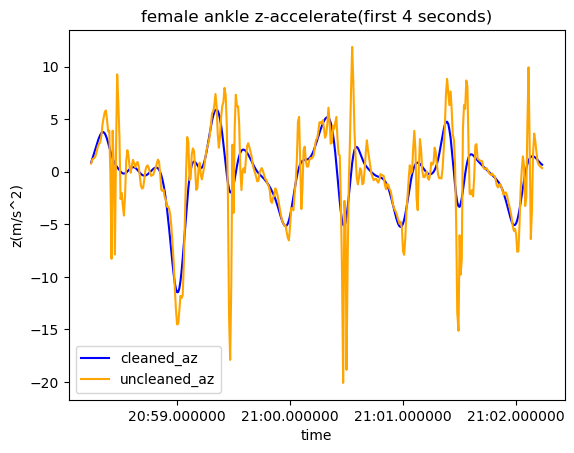

In [10]:
#plt.ylim(0, 2)
plt.plot(clean_female_ankle_walk_data['time'][:400], clean_female_ankle_walk_data['az'][:400], 'blue',label='cleaned_az')
plt.plot(unclean_female_ankle_walk_data['time'][:400], unclean_female_ankle_walk_data['az'][:400], 'orange',label='uncleaned_az')
plt.title('female ankle z-accelerate(first 4 seconds)')
plt.xlabel('time')
plt.ylabel('z(m/s^2)')
plt.legend()
plt.show()

In [11]:
# output the clean dataset
clean_male_ankle_walk_data.to_csv('./clean_dataset/clean_male_ankle_walk.csv',index=False)
clean_male_ankle_run_data.to_csv('./clean_dataset/clean_male_ankle_run.csv',index=False)
clean_male_arm_walk_data.to_csv('./clean_dataset/clean_male_arm_walk.csv',index=False)
clean_female_ankle_walk_data.to_csv('./clean_dataset/clean_female_ankle_walk.csv',index=False)